In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys, yaml
sys.path.insert(0,'../')
import StatPol as SP, Routines as R

basepath = os.getcwd()

# Data analysis

In [2]:
nsp_results = yaml.load(open('nsp_results.yaml'))
#nsp_results

In [3]:
computed_mol = R.build_computed_mol_list(nsp_results)
print 'Number of computed molecules', len(computed_mol)

Number of computed molecules 74


## First checks of the convergence procedure

We check if convergence has been achieved, both on the field intensity and on the value of rmult

In [4]:
for mol in computed_mol:
    results = nsp_results[mol]['results']
    for study in results:
        if results[study]['field_conv']['converged']==False:
            print mol, study, 'field convergence failed'
        if results[study]['rmult_conv']['converged']==False:
            print mol, study, 'rmult convergence failed'

NaCl ('lda_pw', 'hgh_k') field convergence failed


The field convergence on this study has to be further investigated

For each study we extract the convergend values of the field or the value of rmult

In [5]:
print 'mol', 'study', 'field_conv', 'rmult_conv'
for mol in computed_mol:
    print mol
    results = nsp_results[mol]['results']
    for study in results:
        print ' ', study,results[study]['field_conv']['converged_value'],\
        results[study]['rmult_conv']['converged_value']

mol study field_conv rmult_conv
AlF
  ('lda_pw', 'hgh_k') 0.01 6.0
  ('lda_pt', 'hgh_k') 0.01 6.0
  ('pbe0', 'hgh_k') 0.01 6.0
  ('pbe', 'nlcc_ss') 0.01 6.0
  ('pbe', 'nlcc_aw') 0.01 6.0
  ('pbe', 'hgh_k') 0.01 6.0
Ar
  ('lda_pw', 'hgh_k') 0.01 7.0
  ('pbe', 'hgh_k') 0.01 7.0
  ('pbe0', 'hgh_k') 0.01 7.0
  ('lda_pt', 'hgh_k') 0.01 7.0
BF
  ('lda_pw', 'hgh_k') 0.01 6.0
  ('lda_pt', 'hgh_k') 0.01 6.0
  ('pbe0', 'hgh_k') 0.01 6.0
  ('pbe', 'nlcc_ss') 0.01 6.0
  ('pbe', 'nlcc_aw') 0.01 6.0
  ('pbe', 'hgh_k') 0.01 6.0
BH2Cl
  ('lda_pw', 'hgh_k') 0.01 6.0
  ('lda_pt', 'hgh_k') 0.01 6.0
  ('pbe0', 'hgh_k') 0.01 6.0
  ('pbe', 'nlcc_ss') 0.01 6.0
  ('pbe', 'nlcc_aw') 0.01 6.0
  ('pbe', 'hgh_k') 0.01 6.0
BH2F
  ('lda_pw', 'hgh_k') 0.01 6.0
  ('lda_pt', 'hgh_k') 0.01 6.0
  ('pbe0', 'hgh_k') 0.01 6.0
  ('pbe', 'nlcc_ss') 0.01 6.0
  ('pbe', 'nlcc_aw') 0.01 6.0
  ('pbe', 'hgh_k') 0.01 6.0
BH3
  ('lda_pw', 'hgh_k') 0.01 5.0
  ('lda_pt', 'hgh_k') 0.01 5.0
  ('pbe0', 'hgh_k') 0.01 5.0
  ('pbe', 'nlcc_s

We see that both the field convergence and the rmult convergence values changes for the different molecules and studies of the dataset. This fact indicates that the (quite complex) procedure for the determination of these parameters has been useful.

## RMSRE and MRE for each study of the nsp dataset

We compute the RMSRE and MRE for each study and collect the result in a table. This analysis provides a measurement of the effects of the psp on the determination of the statical polarizability for the molecules of the dataset.

Compute the RMSRE and MRE errors for all the performed study

In [37]:
reload(R)
#reduced_study_set = [('lda_pt','hgh_k'),('lda_pw','hgh_k'),('pbe','hgh_k'),\
#                     ('pbe','nlcc_aw'),('pbe','nlcc_ss'),('pbe0','hgh_k')]
reduced_study_set = [('lda_pw','hgh_k'),('pbe','hgh_k'),('pbe','nlcc_aw'),\
                     ('pbe','nlcc_ss'),('pbe0','hgh_k')]


In [38]:
print 'study', 'RMSRE', 'MRE'
for study in reduced_study_set:
    print '{} {:1.2f} {:1.2f}'.format(study,R.eval_rmsre(nsp_results,study[0],study[1]),\
                                 R.eval_mre(nsp_results,study[0],study[1]))

study RMSRE MRE
('lda_pw', 'hgh_k') 1.03 -0.22
('pbe', 'hgh_k') 0.58 -0.18
('pbe', 'nlcc_aw') 0.51 -0.25
('pbe', 'nlcc_ss') 0.89 -0.34
('pbe0', 'hgh_k') 0.51 -0.14


Compute the array with the relative error for each molecule and study

In [39]:
print 'molecule', 'study', 'Relative error'
for mol in computed_mol:
    print mol
    for study in reduced_study_set:
        re = R.eval_relative_error(nsp_results,mol,study[0],study[1])
        re_str = ''
        if not (re is None):
            re_str = ['{:1.2f}'.format(x) for x in re]
        print ' ',study,re_str

molecule study Relative error
AlF
  ('lda_pw', 'hgh_k') ['0.15', '0.15', '0.19']
  ('pbe', 'hgh_k') ['-0.59', '-0.59', '-0.04']
  ('pbe', 'nlcc_aw') ['1.00', '1.00', '0.75']
  ('pbe', 'nlcc_ss') ['-0.35', '-0.35', '0.11']
  ('pbe0', 'hgh_k') ['-0.68', '-0.68', '0.12']
Ar
  ('lda_pw', 'hgh_k') ['-0.35', '-0.35', '-0.35']
  ('pbe', 'hgh_k') ['-0.31', '-0.31', '-0.31']
  ('pbe', 'nlcc_aw') 
  ('pbe', 'nlcc_ss') 
  ('pbe0', 'hgh_k') ['-0.23', '-0.23', '-0.23']
BF
  ('lda_pw', 'hgh_k') ['0.57', '0.57', '0.37']
  ('pbe', 'hgh_k') ['0.39', '0.39', '0.14']
  ('pbe', 'nlcc_aw') ['0.54', '0.54', '0.47']
  ('pbe', 'nlcc_ss') ['0.39', '0.39', '1.04']
  ('pbe0', 'hgh_k') ['0.65', '0.65', '0.50']
BH2Cl
  ('lda_pw', 'hgh_k') ['0.26', '-0.06', '0.04']
  ('pbe', 'hgh_k') ['0.29', '-0.07', '-0.01']
  ('pbe', 'nlcc_aw') ['-0.19', '-0.53', '-0.57']
  ('pbe', 'nlcc_ss') ['-0.29', '-0.71', '-0.56']
  ('pbe0', 'hgh_k') ['0.14', '-0.19', '-0.04']
BH2F
  ('lda_pw', 'hgh_k') ['0.06', '-0.43', '-0.00']
  ('pbe',

## Plot of the average relative error

In [41]:
reduced_study_set

[('lda_pw', 'hgh_k'),
 ('pbe', 'hgh_k'),
 ('pbe', 'nlcc_aw'),
 ('pbe', 'nlcc_ss'),
 ('pbe0', 'hgh_k')]

In [98]:
%matplotlib auto
study = reduced_study_set[0]
index = []
values = []
for ind,mol in enumerate(computed_mol):
    re = R.eval_re_molecule(nsp_results,mol,study[0],study[1])
    index.append(ind)
    values.append(re)
title = 'Average relative error for %s-%s'%(study[0],study[1])
plt.scatter(computed_mol,values,marker='s',s=100,color='blue')
plt.plot(computed_mol,values,linestyle='--',linewidth=2)
plt.axhline(y=0., color='black', linestyle='--',linewidth=1)
plt.title(title,size = 30)
plt.ylabel('Relative error (%)',size=24)
plt.xticks(index,computed_mol,rotation='vertical',size=24)
ax = plt.axes()  
ax.yaxis.grid(linestyle='--') # horizontal lines
ax.xaxis.grid(linestyle='--') # vertical lines
#plt.legend()
plt.show()

Using matplotlib backend: TkAgg


## Attempt of a scatter plot

I have to add a color/symbol policy for the various psp's

In [71]:
symbols = {'hgh_k' : 'o', 'nlcc_aw' : 'v', 'nlcc_ss' : 's'}
colors = {'hgh_k' : 'black', 'nlcc_aw' : 'red', 'nlcc_ss' : 'blue'}

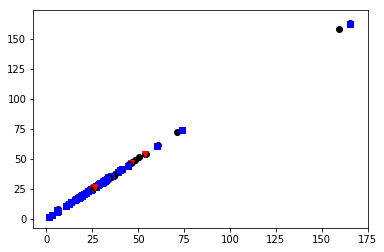

In [72]:
for mol in computed_mol:
    for study in reduced_study_set:
        if study[0] in nsp_results[mol]['ref_results'] and study in nsp_results[mol]['results']:
            alpha_avg_ref = sum(nsp_results[mol]['ref_results'][study[0]])/(3.0*R.AuToA)
            alpha_avg = sum(R.get_study_alpha_diag(nsp_results[mol]['results'],study[0],study[1]))/3.
            plt.scatter(alpha_avg_ref,alpha_avg,marker=symbols[study[1]],color=colors[study[1]])
plt.show()

not very tale telling....